### Package Version
- seaborn==0.10.1
- pandas==1.0.4
- matplotlib==3.2.1

# Context:
TechCrunch is an American online publisher focusing on the tech industry. The company specifically reports on the business related to tech, technology news, analysis of emerging trends in tech, and profiling of new tech businesses and products.
TechCrunch’s Startup Battlefield is the world’s preeminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online. 

# Data description:
Each row in the dataset is a Start-up company and the columns describe the company. 

**Name** - Name of the company

**Website** : Company website

**Crunchbase URL** - URL for company's profile in the Tech crunch database

**Funds Raised** - Funds raised by the company in USD

**Event** - The techcrunch event the company participated in

**Outcome** - Described by Contestant, Finalist, Audience choice, Winner or Runnner up,

**Status** - Current status of the company Operating, Closed , Aquired or Ipo


[Tech Crunch dataset](https://data.world/aurielle/techcrunch-startup-battlefield-all-companies/workspace/file?filename=Copy+of+Blank+Sheet+-+Template+-+Sheet3.csv)


# Tasks:
**1)** Check if the average funds raised by the companies still operating and the companies that got closed is significantly different

**2)** Check if the proportion of companies still operating is different among the companies which came out only as contestants vs companies that either came out as Finalists, Audience choices, Winners or a Runner-ups

# Import the dataset

In [3]:
import pandas as pd

data = pd.read_csv('techcrunch_data.csv')
print(data.shape)
data.head()

(662, 7)


,Name,Website,Crunchbase URL,Funds Raised,Event,Outcome,Status
0,2600Hz,2600hz.com,https://www.crunchbase.com/organization/2600hz,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,https://www.crunchbase.com/organization/3dlt-com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,https://www.crunchbase.com/organization/3dprin...,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,https://www.crunchbase.com/organization/3dprin...,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,https://www.crunchbase.com/organization/42,NaN,Disrupt NYC 2013,Contestant,Operating


# Explore the data

In [4]:
data.dtypes

Name              object
Website           object
Crunchbase URL    object
Funds Raised      object
Event             object
Outcome           object
Status            object
dtype: object

- All the columns are of object type 
- However, we would need the column "Funds Raised" to be of numerical data type
- We shall treat that later

In [5]:
data.isna().sum()

Name                0
Website             6
Crunchbase URL      0
Funds Raised      214
Event               0
Outcome             0
Status              0
dtype: int64

- Turns out we do not have data of funds raised by all the companies
- We would need need it to perform the first task, hence we will have to ignore the companies of which we do not have data for the funds they raised

In [0]:
df1 = data.dropna().copy(deep=True)   # drop the rows which have no data for funds raised

In [7]:
df1['Funds Raised'].sample(5)

591     $5.3M
578     $9.8M
244    $12.5M
447     $7.4M
364      $50K
Name: Funds Raised, dtype: object

- We do not have absolute numbers to directly use in our tests
- The values need some pre-processing
- We will strip the values of the dollar sign and the abbreviations
- First we will have to check all the various abbreviations that the numbers are represented by, then based on the abbreviation we have to bring those numbers on the same scale

In [0]:
df1.loc[:,'Funds_in_million'] = df1['Funds Raised'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

**Code Explanation:**
Within the lambda function, we passed two if else blocks. If the last element in the value is 'K', then divide the number by 1000 else, if it is 'B', multiply by 1000 else, return as it is. We passed this lambda function to the apply method which we used on the 'Funds Raised' column and assigned the result to a new column ('funds_in_million') in the dataframe

In [9]:
df1.sample(3)

,Name,Website,Crunchbase URL,Funds Raised,Event,Outcome,Status,Funds_in_million
534,Stereolabs,stereolabs.com,https://www.crunchbase.com/organization/stereo...,$2M,Hardware Battlefield 2016,Contestant,Operating,2.0000
500,Siren Care,siren.care,https://www.crunchbase.com/organization/siren-ivs,$129.8K,-,Winner,Operating,0.1298
116,Codeanywhere,codeanywhere.net,https://www.crunchbase.com/organization/codean...,$848K,Disrupt NYC 2014,Audience choice,Operating,0.8480


- Run the above cell a couple of times to quickly verify the values
- We have brought the data to a usable form for analysis


### Task 1

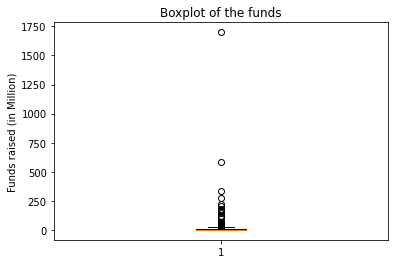

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

plot = plt.boxplot(df1.Funds_in_million)
plt.title('Boxplot of the funds')
plt.ylabel("Funds raised (in Million)")

plt.show()

- There are significant outliers in the data
- For the purpose of this test, we shall remove them

In [11]:
upper_fence = plot['caps'][1].get_data()[1][1]   # we can use the values from the box plot itself to get the upper fence
upper_fence

22.0

In [12]:
print(f'Number of outliers = {len(df1[df1.Funds_in_million > upper_fence])}')

df1[df1.Funds_in_million > upper_fence]

Number of outliers = 60


,Name,Website,Crunchbase URL,Funds Raised,Event,Outcome,Status,Funds_in_million
6,8 Securities,8securities.com,https://www.crunchbase.com/organization/8-secu...,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0
31,Anyclip,anyclip.com,https://www.crunchbase.com/organization/anyclip,$24M,TC50 2009,Finalist,Operating,24.0
40,Artsy,artsy.net,https://www.crunchbase.com/organization/art-sy,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9
49,Badgeville,badgeville.com,https://www.crunchbase.com/organization/badgev...,$40M,Disrupt SF 2010,Finalist,Acquired,40.0
56,Betterment,betterment.com,https://www.crunchbase.com/organization/better...,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
108,Clickable,clickable.com,https://www.crunchbase.com/organization/clickable,$32.5M,TC40 2007,Finalist,Acquired,32.5
113,Cloudflare,cloudflare.com,https://www.crunchbase.com/organization/cloudf...,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
128,Credit Sesame,creditsesame.com,https://www.crunchbase.com/organization/credit...,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4
130,CrowdFlower Inc.,crowdflower.com,https://www.crunchbase.com/organization/crowdf...,$38M,TC50 2009,Contestant,Operating,38.0
132,Cubic Telecom,cubictelecom.com,https://www.crunchbase.com/organization/cubict...,$37.1M,TC40 2007,Contestant,Operating,37.1


- The above 60 records are of companies that have been funded excessively in comparision to the others in the pool
- Let's see the distribution without these outliers

In [0]:
df1.drop(df1[df1.Funds_in_million > upper_fence].index, inplace = True)

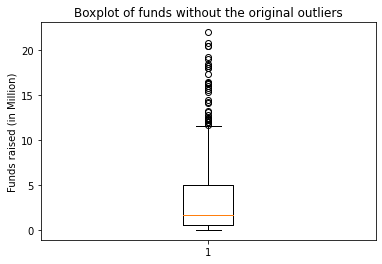

In [14]:
plot = plt.boxplot(df1.Funds_in_million)
plt.title('Boxplot of funds without the original outliers')
plt.ylabel("Funds raised (in Million)")
plt.show()

In [15]:
df1.Status.value_counts()

Operating    275
Closed        56
Acquired      55
Name: Status, dtype: int64

- Our companies of interest for task 1 are 275 companies that are opetaring and 57 that got closed

In [2]:
import seaborn as sns

sns.distplot(df1.Funds_in_million)
plt.title('Distribution of funds raised across all companies')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


NameError: name 'df1' is not defined

In [17]:
df1.Funds_in_million.describe()

count    386.00000
mean       3.72514
std        4.73236
min        0.00500
25%        0.60000
50%        1.70000
75%        5.00000
max       22.00000
Name: Funds_in_million, dtype: float64

- 75% of the companies have less than 5 million raised funds, the max however is 22
- Even after removing the outliers, the data is pretty heavily skewed

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(df1.loc[df1.Status == 'Operating', 'Funds_in_million'], ax = ax[0])
sns.distplot(df1.loc[df1.Status =='Closed', 'Funds_in_million'], ax = ax[1])

ax[0].set_title('Funds raised by the companies still operating')
ax[1].set_title('Funds raised by companies that got closed')
plt.show()

- Visually the distributions are quiet similar
- To prove if there is a significant difference or not we will have to perform a hypothesis test
- Since we want to compare the difference in means of the samples, we can either use 2 sample t test or z-test
- For this exercise we shall do both and compare the results
- One thing to notice is that the distributions are not normal yet, since our sample size is reasonably big ( >30 samples), we will go ahead with the aforementioned tests

For the first test, 

**Null hypothesis (Ho)** : There is no difference between the two means

**Alternate hypothesis (Ha)** : There is significant difference between the two means

In [19]:
from statsmodels.stats.weightstats import ztest

sample1 = df1.loc[df1.Status == 'Operating', 'Funds_in_million']
sample2 = df1.loc[df1.Status =='Closed', 'Funds_in_million']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
    

	 Since the p-value, 0.192 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [20]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


- From the tests above we found no evidence to state that the companies that have raised more money tend to suceed more or vice-versa

### Task 2

In [21]:
df2 = data.copy(deep = True)
df2.head()

,Name,Website,Crunchbase URL,Funds Raised,Event,Outcome,Status
0,2600Hz,2600hz.com,https://www.crunchbase.com/organization/2600hz,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,https://www.crunchbase.com/organization/3dlt-com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,https://www.crunchbase.com/organization/3dprin...,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,https://www.crunchbase.com/organization/3dprin...,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,https://www.crunchbase.com/organization/42,NaN,Disrupt NYC 2013,Contestant,Operating


In [22]:
df2.Outcome.value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Outcome, dtype: int64

- There are 488 who remained contestants and the rest came out as something more, we'll call all of them winners for now

In [0]:
winners = df2.Outcome.value_counts()[1:].sum()
contestants = df2.Outcome.value_counts()['Contestant']

In [0]:
contestants_operating = df2.Status[df2.Outcome == 'Contestant'].value_counts().loc['Operating']
winners_operating = df2.Status[df2.Outcome != 'Contestant'].value_counts().loc['Operating']


In [25]:
winners_operating/winners, contestants_operating/contestants

(0.764367816091954, 0.680327868852459)

- There is some difference between the proportion operational companies in the two categories, but let's see if the differnce is significant
- There are two ways we can check if the difference is significant
    - Z-test for proportions
    - Chi-square test
- We shall perform z-test in this case, however, do experiment with Chi-square test and observe if the p-value from both tests gives the same conclusion or not

**Null hyputhesis (Ho)**: The proportion of companies that are operating is the same in both categories - winners and contestants

**Alternative hypothesis (Ha)**: The proportion of companies that are operating is significantly different from each other, among the two categories

In [26]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.037 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


# Conclusion:
- The amount of funds a company raises is not a significant factor in deciding if the company will remain operational or close down
- Winners in the tech-crunch battle have proven to remain operational more so, than the companies that came out only as contestants

# Bonus

We have the information about the event location where each company has participated and in which year so what we want to do is, see if there is a significant difference among the funds raised by the companies from New York, San Fransisco and Europe (EU and London combined)

In [27]:
df1[df1.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt NY 2015         21
Disrupt SF 2014         19
Disrupt SF 2013         19
Disrupt SF 2011         19
Disrupt NYC 2013        19
Disrupt SF 2015         19
Disrupt NYC 2012        19
Disrupt SF 2016         17
Disrupt NY 2016         16
Disrupt SF 2012         15
Disrupt NYC 2014        15
Disrupt NYC 2011        15
Disrupt SF 2010         13
Disrupt London 2015     11
Disrupt NYC 2010        10
Disrupt London 2016     10
Disrupt EU 2014         10
Disrupt EU 2013          9
Disrupt Beijing 2011     4
Name: Event, dtype: int64

- We have considered only the "Tech Crunch Disrupt" events
- Since we have the data for the EU only from 2013, we'll drop the records pertaining to events earlier than 2013

In [28]:
events = df1[df1.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event  # all the events of relevance
events

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
635        Disrupt NY 2015
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
660        Disrupt SF 2013
Name: Event, Length: 185, dtype: object

In [29]:
NY_events = df1.loc[events[events.apply(lambda x: 'NY' in x)].index, 'Funds_in_million']
SF_events = df1.loc[events[events.apply(lambda x: 'SF' in x)].index, 'Funds_in_million']
EU_events = df1.loc[events[events.apply(lambda x: 'EU' in x or 'London' in x)].index, 'Funds_in_million']
print(len(NY_events), len(SF_events), len(EU_events))

71 74 40


- Each of the three above variables hold the amount of funds with respect to the Cities where the even was organised
- The sample sizes are different across the three categories and it is okay to perform ANOVA on samples of different sizes


**Null Hypothesis(Ho)**: Average funds raised by companies across three cities are the same 

**Alternative Hypothesis(Ha)**: Average funds raised by companies across three cities are the different

In [1]:
plt.figure(figsize=(15,6))
sns.distplot(NY_events, color = 'Red', label = 'NY')
sns.distplot(SF_events, color = 'Gold', label = 'SF')
sns.distplot(EU_events, color = 'blue', label = 'EU')
plt.legend()
plt.show()


NameError: name 'plt' is not defined

- Visually the distributions look quiet similar
- The Modes of the three distributions are quiet the same
- Dispersion in NY quiet high compared to the others
- Let's see what the test says

In [31]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(NY_events, SF_events, EU_events)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.628 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


- The distribution of funds raised by the companies across the three regions is the same
- We found no evidence to say companies participating in certain regions have funds either significantly on the higher side or on the lower side

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.